In [7]:
%cd ..

/mnt/c/Users/XCB/OneDrive - Van Oord/Documents/thesis/code


In [6]:
import pygmt
import geopandas as gpd

In [149]:
tracklines = gpd.read_file("../data/test_sites/florida_keys/tracklines/")

In [153]:
aoi = gpd.read_file("../data/test_sites/florida_keys/AOI.gpkg")
# aoi = aoi.to_crs(aoi.estimate_utm_crs())
minx, miny, maxx, maxy = aoi.geometry.total_bounds

array([-81.17026435,  24.60670683, -80.86583989,  24.85686728])

In [178]:
# this tortured fstring is needed to match with pygmt conventions
expand_deg = 0.05
region = f"{minx-expand_deg}/{maxx+expand_deg}/{miny-expand_deg}/{maxy+expand_deg}"
region

'-81.2202643528336/-80.81583988906534/24.556706833150788/24.906867278480135'

/home/mlinds/mambaforge/envs/thesis_env/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


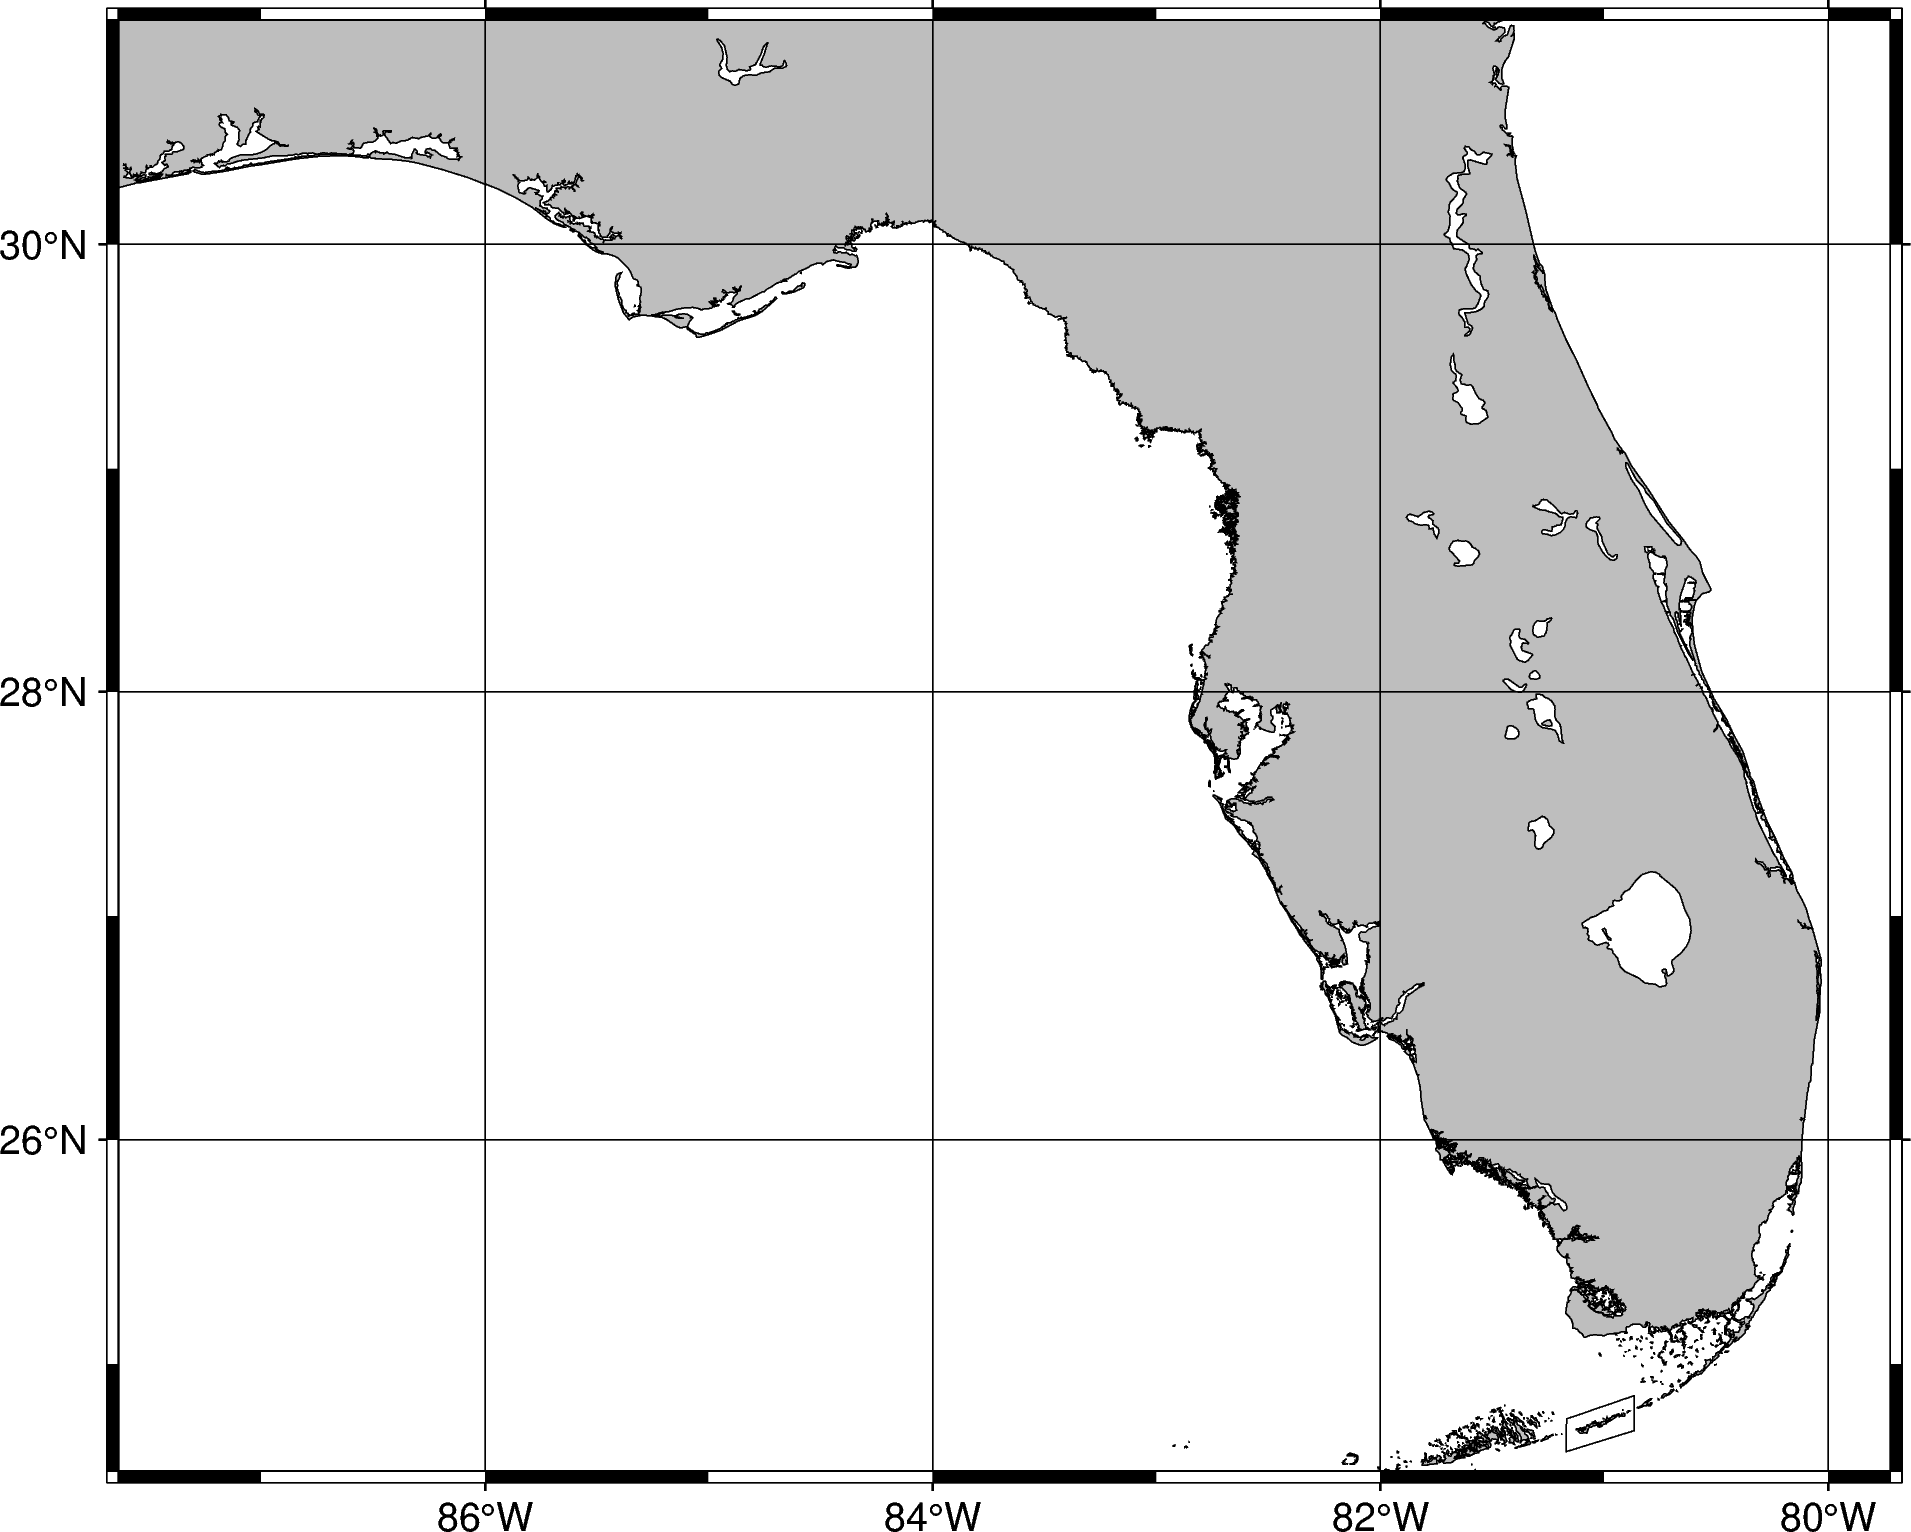

In [179]:
fig = pygmt.Figure()
fig.coast(
    region="US.FL", land="gray", water="white", shorelines="thinnest", frame="fga"
)
# lon,lat bottom corner, lon,lat upper corner
# lat = y, lon = x

# xmin,ymin
box = [-86, 26, -84.5, 27]
fig.plot(aoi)
fig.show()

In [180]:
bounds

array([-81.17026435,  24.60670683, -80.86583989,  24.85686728])

In [2]:
fig = pygmt.Figure()
fig.coast(region="US.FL", land="gray", water="white", shorelines="thinnest")

fig.plot(aoi, pen="2p,blue")

NameError: name 'pygmt' is not defined

/home/mlinds/mambaforge/envs/thesis_env/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/home/mlinds/mambaforge/envs/thesis_env/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/home/mlinds/mambaforge/envs/thesis_env/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


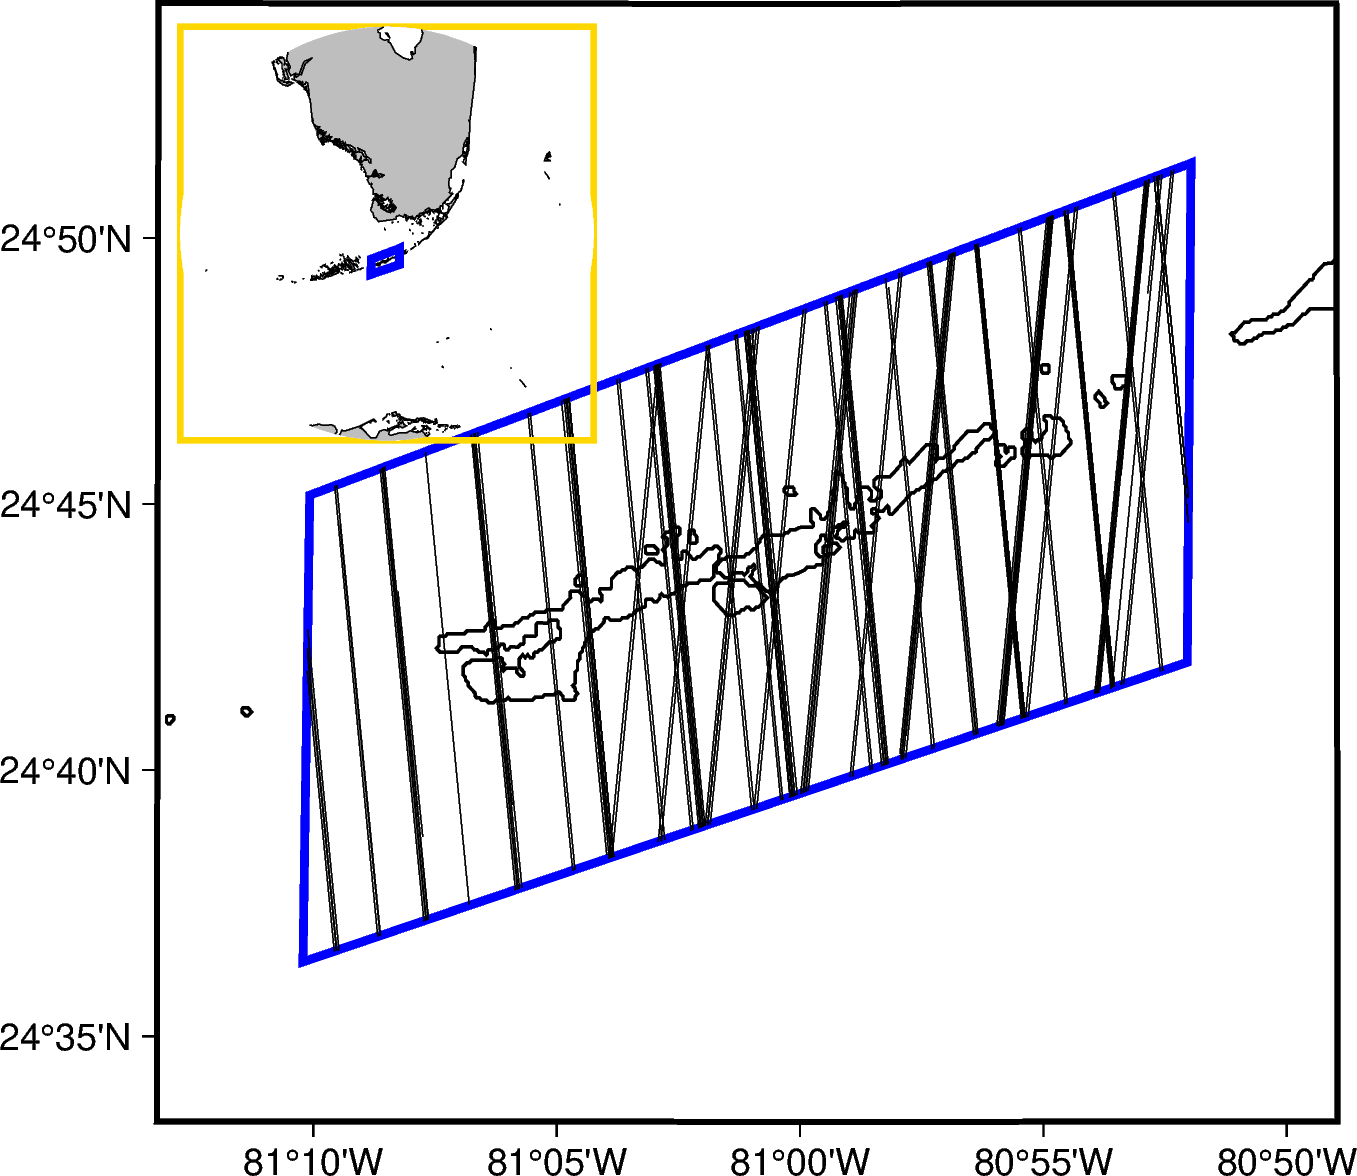

In [183]:
fig = pygmt.Figure()
fig.coast(projection="U17N/10c", shorelines="thin", frame="a", region=region)
fig.plot(aoi, pen="2p,blue")
fig.plot(
    tracklines,
)
with fig.inset(position="jTL+w3.5c+o0.2c", margin=0, box="+p1.5p,gold"):
    fig.coast(region="US.FL", land="gray", water="white", shorelines="thinnest")
    rectangle = bounds
    fig.plot(aoi, pen="2p,blue")


fig.show()